# 데이터프레임 합치기
- 두개 이상의 DataFrame을 합쳐 하나의 DataFrame으로 만든다.

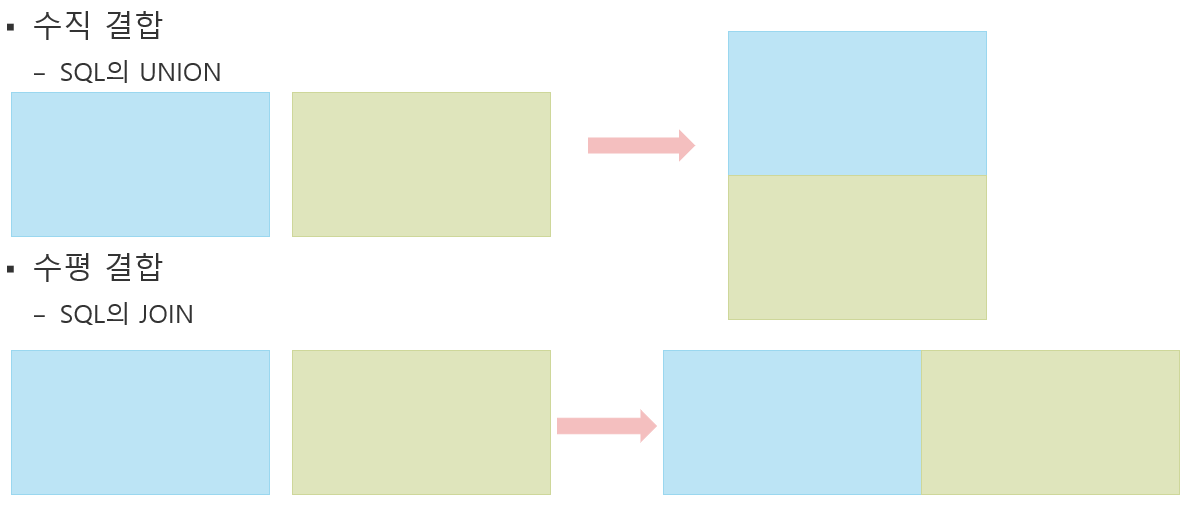

In [1]:
#수직 결합은 column의 수가 더해지지 않는다. 그러나, 수평 결합은 column의 수가 더해진다. 
#수직 결합은 '원래 합쳐져 있던 건데, 원래대로 돌려보내겠다'라는 식으로 하는 것이다.

#sql과 연결시켜 잘 생각해 보면, 이해가 빠를 것이다.


#수직 결합은 나눠진 것을 다시 합치는 단순 결합인데,
#수평 결합은 단순 결합보다는 sql의 join문과 비슷하다고 볼 수 있다.
#join은 2개 이상의 dataframe이 있을 때 쓰인다.




- **수직결합**
    - 단순결합으로 여러개의 DataFrame들의 같은 컬럼끼리 수직으로 합친다.
- **수평결합**
    - 연관성 있는 여러 데이터를 하나로 합쳐서 조회하는 JOIN 처리를 한다.
    - JOIN은 합치려는 DataFrame들의 index 나 특정 컬럼의 값이 같은 행 끼리 합친다.

## 데이터셋 읽기
- stocks_2016.csv, stocks_2017.csv, stocks_2018.csv : 년도별 보유 주식
- stocks_info.csv : 주식 정보

In [4]:
#4개의 csv파일을 읽어 들이려면 어떻게 해야 할까?

import pandas as pd

pd.read_csv("saved_data/stocks_2016.csv")
pd.read_csv("saved_data/stocks_2018.csv")
pd.read_csv("saved_data/stocks_2017.csv")
pd.read_csv("saved_data/stocks_info.csv")

,Symbol,Name
0,AAPL,Apple Inc
1,TSLA,Tesla Inc
2,WMT,Walmart Inc
3,GE,General Electric
4,IBM,IBM(International Business Machines Co)
5,SLB,Schlumberger Limited.
6,TXN,Texas Instruments Incorporated
7,AMZN,"Amazon.com, Inc"


In [6]:
#위와 같이 하나하나 할 수도 있지만...... 이렇게 할 수도 있다.
#파일명이 다 제각각 다른 경우(패턴이 없는 경우)는 리스트에 전체 경로를 다 넣는다.
["saved_data/stocks_2016.csv","saved_data/stocks_2017.csv","saved_data/stocks_2018.csv","saved_data/stocks_info.csv"]

['saved_data/stocks_2016.csv',
 'saved_data/stocks_2017.csv',
 'saved_data/stocks_2018.csv',
 'saved_data/stocks_info.csv']

In [8]:
files = ["2016","2017","2018","info"]
[pd.read_csv(f"saved_data/stocks_{file}.csv") for file in files] #이런 식으로도 쉽게 읽을 수 있다.
#이런 식으로 데이터를 읽으면, 최종적으로 dataframe이 리스트에 다 들어간다.

[  Symbol  Shares  Low  High
 0   AAPL      80   95   110
 1   TSLA      50   80   130
 2    WMT      40   55    70,
   Symbol  Shares  Low  High
 0   AAPL      50  120   140
 1     GE     100   30    40
 2    IBM      87   75    95
 3    SLB      20   55    85
 4    TXN     500   15    23
 5   TSLA     100  100   300,
   Symbol  Shares  Low  High
 0   AAPL      40  135   170
 1   AMZN       8  900  1125
 2   TSLA      50  220   400,
   Symbol                                     Name
 0   AAPL                                Apple Inc
 1   TSLA                                Tesla Inc
 2    WMT                              Walmart Inc
 3     GE                         General Electric
 4    IBM  IBM(International Business Machines Co)
 5    SLB                    Schlumberger Limited.
 6    TXN           Texas Instruments Incorporated
 7   AMZN                          Amazon.com, Inc]

In [11]:
#자, 지금이 바로 list 대입을 해야 하는 타이밍이다.

stock_2016,stock_2017,stock_2018,stock_info=[pd.read_csv(f"saved_data/stocks_{file}.csv") for file in files]

print(stock_2016.shape)
print(stock_2017.shape)
print(stock_2018.shape)
print(stock_info.shape)

(3, 4)
(6, 4)
(3, 4)
(8, 2)


In [ ]:
"saved_data/*.csv" #디렉토리 바로 아래있는 파일들 중 확장자가 csv인 파일들의 경로


In [12]:
"data/**/*.csv" #data 디렉토리+ 그 하위 디렉토리에 있는 모든 csv파일.

'data/**/*.csv'

In [16]:
from glob import glob
#위의 것들을 이런 식으로 쓸 수 있다.
#glob 메소드를 잘 보도록 하자.
[pd.read_csv(file) for file in glob("saved_data/stock*.csv")]

[  Symbol  Shares  Low  High
 0   AAPL      80   95   110
 1   TSLA      50   80   130
 2    WMT      40   55    70,
   Symbol  Shares  Low  High
 0   AAPL      50  120   140
 1     GE     100   30    40
 2    IBM      87   75    95
 3    SLB      20   55    85
 4    TXN     500   15    23
 5   TSLA     100  100   300,
   Symbol  Shares  Low  High
 0   AAPL      40  135   170
 1   AMZN       8  900  1125
 2   TSLA      50  220   400,
   Symbol                                     Name
 0   AAPL                                Apple Inc
 1   TSLA                                Tesla Inc
 2    WMT                              Walmart Inc
 3     GE                         General Electric
 4    IBM  IBM(International Business Machines Co)
 5    SLB                    Schlumberger Limited.
 6    TXN           Texas Instruments Incorporated
 7   AMZN                          Amazon.com, Inc]

In [17]:
stock_2018

,Symbol,Shares,Low,High
0,AAPL,40,135,170
1,AMZN,8,900,1125
2,TSLA,50,220,400


In [19]:
stock_info #코드와 실제 회사 이름이 있다.

,Symbol,Name
0,AAPL,Apple Inc
1,TSLA,Tesla Inc
2,WMT,Walmart Inc
3,GE,General Electric
4,IBM,IBM(International Business Machines Co)
5,SLB,Schlumberger Limited.
6,TXN,Texas Instruments Incorporated
7,AMZN,"Amazon.com, Inc"


## concat() 이용
- 수직, 수평 결합 모두 지원한다.
- 하나의 데이터셋을 여러 DataFrame으로 나눈 것을 하나의 DataFrame으로 합칠 때 사용한다.

- **수직 결합** (행이 늘어나도록 합친다.)
    - **컬럼명이 같은 열끼리 합친다.**
    - 같은 column 명이 없는 열들도 결과 DataFrame에 들어간다.(default)
        - full outer join개념
- **수평결합** (열이 늘어나도록 합친다.)
    - **index명이 같은 행 끼리 합친다.** (equi-join)
    - 같은 index명이 없는 행들도 결과 DataFrame에 들어간다.(default)
        - full outer join

- pd.concat(objs,  [, key=리스트]), axis=0, join='outer' )
- 수직으로 합칠 것인가, 수평으로 합칠 것인가에 따라 axis의 숫자를 정하면 된다.
    - 매개변수
        - objs: 합칠 DataFrame들을 리스트로 전달
        - keys=[] 를 이용해 합친 행들을 구분하기 위한 다중 인덱스 처리
        - axis
            - 0 또는 index : 수직결합
            - 1 또는 columns : 수평결합
        - join: (outer인가, inner인가에 따라서 많이 갈린다. 이 개념을 다시 기억하자.)
            - 합치는 방식으로 다음 문자열을 값으로 설정한다.
                - 'outer'(기본값): full outer join
                - 'inner': inner join (동일한 index명, column명 끼리 합친다.)

> ### 조인(join)
> - 여러 데이터프레임에 흩어져 있는 정보 중 필요한 정보만 모아서 결합하기 위한 것.
> - 두개 이상의 데이터프레임을 특정 컬럼(열)의 값이 같은 행 끼리 수평 결합하는 것.
> - Inner Join, Left Outer Join, Right Outer Join, Full Outer Join

In [25]:
#default 방향:0--->수직 결합. 같은 컬럼명끼리 합치는 것.
#1---->수평 결합.
stocks = pd.concat([stock_2016,stock_2017,stock_2018]) #이런 식으로 3개를 넣어야 한다.
stocks.shape #각각 3행,6행,3행이 합쳐져서 12행이 되었다.

(12, 4)

In [26]:
stocks

,Symbol,Shares,Low,High
0,AAPL,80,95,110
1,TSLA,50,80,130
2,WMT,40,55,70
0,AAPL,50,120,140
1,GE,100,30,40
2,IBM,87,75,95
3,SLB,20,55,85
4,TXN,500,15,23
5,TSLA,100,100,300
0,AAPL,40,135,170


In [28]:
#근데, 위와 같은 표를 loc으로 조회한다면, 아래와 같은 결과가 나온다.

stocks.loc[0]

,Symbol,Shares,Low,High
0,AAPL,80,95,110
0,AAPL,50,120,140
0,AAPL,40,135,170


In [31]:
stocks2 = pd.concat([stock_2016,stock_2017,stock_2018],ignore_index=True) #ignore_index는 index이름은 합칠때 무시한다는 의미.

stocks2 #이렇게 하면 결과가 잘 나온다.

,Symbol,Shares,Low,High
0,AAPL,80,95,110
1,TSLA,50,80,130
2,WMT,40,55,70
3,AAPL,50,120,140
4,GE,100,30,40
5,IBM,87,75,95
6,SLB,20,55,85
7,TXN,500,15,23
8,TSLA,100,100,300
9,AAPL,40,135,170


In [39]:
stocks3 = pd.concat([stock_2016,stock_2017,stock_2018],keys=["2016년","2017년","2018년"]) #각 dataframe을 구분할 수 있는 index를 추가.


#keys가 추가된 모습을 볼 수 있다.
stocks3

Symbol  Shares  Low  High
2016년 0   AAPL      80   95   110
      1   TSLA      50   80   130
      2    WMT      40   55    70
2017년 0   AAPL      50  120   140
      1     GE     100   30    40
      2    IBM      87   75    95
      3    SLB      20   55    85
      4    TXN     500   15    23
      5   TSLA     100  100   300
2018년 0   AAPL      40  135   170
      1   AMZN       8  900  1125
      2   TSLA      50  220   400

In [36]:
#multi index:컬럼명이나 index명이 여러개의 값으로 구성된 것.
##level : 컬럼을 구성하는 값들의 단위(단계)를 level이라고 한다.
## 밖에서 안으로 들어오는 방향으로 0,1,2, level이 된다. (반대방향은 음수 index이다.)
### level_0 | level_1 | level_2
### 2016   |  2017   | 2018





In [43]:
stocks3.loc['2016년'] #멀티 인덱스에서는 level 0기준으로 조회하는 것이다.
stocks3.loc[('2016년',0)] #level 0, level 1 묶어서 조회 -> 튜플로 묶어서 전달한다.
#튜플로 묶어서 전달한다는 것을 잘 파악하자.

Symbol    AAPL
Shares      80
Low         95
High       110
Name: (2016년, 0), dtype: object

In [44]:
stocks3.loc[['2016년','2018년']]

Symbol  Shares  Low  High
2016년 0   AAPL      80   95   110
      1   TSLA      50   80   130
      2    WMT      40   55    70
2018년 0   AAPL      40  135   170
      1   AMZN       8  900  1125
      2   TSLA      50  220   400

In [49]:
#멀티 index의 행/컬럼을 조회하는 메소드
stocks3.xs(0, #조회할 컬럼/행이름
          axis=0, #0:행조회, 1:행조회
          level=1 #조회할 이름의 level 위치.
          
          
          )


#이 메소드는 자유롭게 조작을 하면서 한번 다뤄봐야 할 것 같다.

,Symbol,Shares,Low,High
2016년,AAPL,80,95,110
2017년,AAPL,50,120,140
2018년,AAPL,40,135,170


In [52]:
##열 기준으로 합치기---->index name이 같은 행끼리 합친다.

stocks4 = pd.concat([stock_2016,stock_2017,stock_2018],axis=1) #default는 행끼리 합친다.
stocks4

,Symbol,Shares,Low,High,Symbol,Shares,Low,High,Symbol,Shares,Low,High
0,AAPL,80.0,95.0,110.0,AAPL,50,120,140,AAPL,40.0,135.0,170.0
1,TSLA,50.0,80.0,130.0,GE,100,30,40,AMZN,8.0,900.0,1125.0
2,WMT,40.0,55.0,70.0,IBM,87,75,95,TSLA,50.0,220.0,400.0
3,NaN,NaN,NaN,NaN,SLB,20,55,85,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,TXN,500,15,23,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,TSLA,100,100,300,NaN,NaN,NaN,NaN


In [53]:
stock_2016 # 0, 1, 2
stock_2017 #0, 1, 2, 3, 4, 5
stock_2018 #0, 1, 2

,Symbol,Shares,Low,High
0,AAPL,40,135,170
1,AMZN,8,900,1125
2,TSLA,50,220,400


In [61]:
#inner join을 하자.


#이 코드에 관한 것은 기억을 잘 해두자.

stock5 = pd.concat([stock_2016,stock_2017,stock_2018],axis=1,join="inner",
                   #ignore_index = True, #수평=> 컬럼명을 무시
         keys=['2016년','2017년','2018년'])
#inner join ===> 같은 index 이름끼리만 합친다.
#keys =>컬럼을 multi index 컬럼으로 한다.


stock5

2016년                  2017년                   2018년                  
  Symbol Shares Low High Symbol Shares  Low High Symbol Shares  Low  High
0   AAPL     80  95  110   AAPL     50  120  140   AAPL     40  135   170
1   TSLA     50  80  130     GE    100   30   40   AMZN      8  900  1125
2    WMT     40  55   70    IBM     87   75   95   TSLA     50  220   400

In [63]:
stock5[('2016년','Shares')] #Level0,Level1 --->tuple로 묶는다.
#위의 표와 아래의 결과를 잘 비교해서 숙지하도록 하자.

0    80
1    50
2    40
Name: (2016년, Shares), dtype: int64

In [64]:
stock5.xs('Shares',level=-1,axis=1)

,2016년,2017년,2018년
0,80,50,40
1,50,100,8
2,40,87,50


## 조인을 통한 DataFrame 합치기
- 연관성있는 둘 이상의 DataFrame을 하나로 합친다.
    - ex) 고객과 주문정보, 교수와 수업정보, 직원과 부서정보
- **join()** (조금 더 자유롭게 합칠 수 있다.)
    - **2개 이상**의 DataFrame을 조인할 때 사용
- **merge()**
    - **2개의** DataFrame의 조인만 지원

### join()
- dataframe객체.join(others, how='left', lsuffix='', rsuffix='') 
- `df_A.join(df_b)`, `df_A.join([df_b, df_c, df_d])`
- 두개 이상의 DataFrame들을 조인 할 수 있다.
    - **조인 기준**: index가 같은 값인 행끼리 합친다. (equi-join) 어떻게 보면 당연한 거다.
    - **조인 기본 방식**: Left Outer Join(이게 기본 방식. 왜냐면 다 나오기 때문.)
- 매개변수
    - lsuffix, rsuffix
        - 조인 대상 DataFrame에 같은 이름의 컬럼이 있으면 에러 발생.
        - 같은 이름이 있는 경우 붙일 접미어 지정
    - how :조인방식. 'left', 'right', 'outer', 'inner'. left가 기본
        

In [67]:
#lsuffix는 같은 이름이 있을 때 접두어를 왼쪽에 둔다.

stock_info.join(stock_2017,lsuffix='_info') #같은 이름이 있으면, 왼쪽에 있는 놈에 접두어를 붙이라는 뜻이다.
#예시를 보면 이해가 잘 갈것이다.
#단, 같은 이름의 컬럼이 있는데, lsuffix 등이 없으면 오류가 난다.


,Symbol_info,Name,Symbol,Shares,Low,High
0,AAPL,Apple Inc,AAPL,50.0,120.0,140.0
1,TSLA,Tesla Inc,GE,100.0,30.0,40.0
2,WMT,Walmart Inc,IBM,87.0,75.0,95.0
3,GE,General Electric,SLB,20.0,55.0,85.0
4,IBM,IBM(International Business Machines Co),TXN,500.0,15.0,23.0
5,SLB,Schlumberger Limited.,TSLA,100.0,100.0,300.0
6,TXN,Texas Instruments Incorporated,NaN,NaN,NaN,NaN
7,AMZN,"Amazon.com, Inc",NaN,NaN,NaN,NaN


In [69]:
#stock_info: Symbol
#stock_2018: Symbol
## Symbol을 index로 변경

join_result1 = stock_info.set_index("Symbol").join(stock_2018.set_index("Symbol"))
join_result1

,Name,Shares,Low,High
Symbol,,,,
AAPL,Apple Inc,40.0,135.0,170.0
TSLA,Tesla Inc,50.0,220.0,400.0
WMT,Walmart Inc,NaN,NaN,NaN
GE,General Electric,NaN,NaN,NaN
IBM,IBM(International Business Machines Co),NaN,NaN,NaN
SLB,Schlumberger Limited.,NaN,NaN,NaN
TXN,Texas Instruments Incorporated,NaN,NaN,NaN
AMZN,"Amazon.com, Inc",8.0,900.0,1125.0


In [70]:
join_result2 = stock_info.set_index("Symbol").join(stock_2018.set_index("Symbol"),how="right") #how는 inner join을 할 것인가 outer join을 할 것인가를 판가름하는 것이다.
join_result2

,Name,Shares,Low,High
Symbol,,,,
AAPL,Apple Inc,40,135,170
AMZN,"Amazon.com, Inc",8,900,1125
TSLA,Tesla Inc,50,220,400


In [ ]:
stock_info.set_index("Symbol").join([stock_2016.set_index("Symbol"),stock_2017.set_index("Symbol")])

In [71]:
stock_2016.set_index("Symbol")

,Shares,Low,High
Symbol,,,
AAPL,80,95,110
TSLA,50,80,130
WMT,40,55,70


In [72]:
stock_2017.set_index("Symbol")

,Shares,Low,High
Symbol,,,
AAPL,50,120,140
GE,100,30,40
IBM,87,75,95
SLB,20,55,85
TXN,500,15,23
TSLA,100,100,300


In [73]:
stock_2016.add_suffix("_2016") #이런 식으로, 컬럼명 뒤에 접미어를 붙여준다.

,Symbol_2016,Shares_2016,Low_2016,High_2016
0,AAPL,80,95,110
1,TSLA,50,80,130
2,WMT,40,55,70


In [74]:
stock_2016.add_prefix("_2016") #이런 식으로, 컬럼명 뒤에 접두어를 붙여준다.

,_2016Symbol,_2016Shares,_2016Low,_2016High
0,AAPL,80,95,110
1,TSLA,50,80,130
2,WMT,40,55,70


In [75]:
stock_2016.set_index("Symbol").add_suffix("_2016") #컬럼명 뒤에 접미어를 붙여준다. set_index도 잊지 말기!

,Shares_2016,Low_2016,High_2016
Symbol,,,
AAPL,80,95,110
TSLA,50,80,130
WMT,40,55,70


In [77]:
#이 코드를 세세히 잘 보도록 하자.

stock_info.set_index("Symbol").join([stock_2016.set_index("Symbol").add_suffix('_2016'),stock_2017.set_index("Symbol").add_suffix('_2017')])

,Name,Shares_2016,Low_2016,High_2016,Shares_2017,Low_2017,High_2017
Symbol,,,,,,,
AAPL,Apple Inc,80.0,95.0,110.0,50.0,120.0,140.0
TSLA,Tesla Inc,50.0,80.0,130.0,100.0,100.0,300.0
WMT,Walmart Inc,40.0,55.0,70.0,NaN,NaN,NaN
GE,General Electric,NaN,NaN,NaN,100.0,30.0,40.0
IBM,IBM(International Business Machines Co),NaN,NaN,NaN,87.0,75.0,95.0
SLB,Schlumberger Limited.,NaN,NaN,NaN,20.0,55.0,85.0
TXN,Texas Instruments Incorporated,NaN,NaN,NaN,500.0,15.0,23.0
AMZN,"Amazon.com, Inc",NaN,NaN,NaN,NaN,NaN,NaN


### merge()
- `df_a.merge(df_b)`
- 두개의 DataFrame간의 조인만 가능하다.
    - **조인 기준**
        - **같은 컬럼명**을 기준으로 equi-join을 하는 것이 기본이다.
        - **조인기준을 다양하게 정할 수 있다.**
            - 컬럼, index등을 기준으로 같은 행끼리 join 하도록 설정할 수 있다.
    - **조인 기본 방식**
        - inner join (default 방식이다.)
        - how 매개변수를 이용해 변경이 가능하다.
- `dataframe.merge(합칠dataframe, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False)`  
- 매개변수
    - on : 같은 컬럼명이 여러개일때 join 대상 컬럼을 선택
    - right_on, left_on : 조인할 때 사용할 왼쪽,오른쪽 Dataframe의 컬럼명. 
    - left_index, right_index: 조인 할때 index를 사용할 경우 True로 지정 
    - how : 조인 방식.  'left', 'right', 'outer', 'inner'. 기본: inner 
    - suffixes: 두 DataFrame에 같은 이름의 컬럼명이 있을 경우 구분을 위해 붙인 접미어를 리스트로 설정
        - 생략시 x, y를 붙인다.       

In [83]:
#default: 같은 이름의 컬럼명을 기준으로 join을 한다.
stock_info.merge(stock_2016,how='left') #stock_2016과 join되는 data들만 나온다.

,Symbol,Name,Shares,Low,High
0,AAPL,Apple Inc,80.0,95.0,110.0
1,TSLA,Tesla Inc,50.0,80.0,130.0
2,WMT,Walmart Inc,40.0,55.0,70.0
3,GE,General Electric,NaN,NaN,NaN
4,IBM,IBM(International Business Machines Co),NaN,NaN,NaN
5,SLB,Schlumberger Limited.,NaN,NaN,NaN
6,TXN,Texas Instruments Incorporated,NaN,NaN,NaN
7,AMZN,"Amazon.com, Inc",NaN,NaN,NaN


In [79]:
stock_info.shape, stock_2016.shape

((8, 2), (3, 4))

In [85]:
stock2016 = stock_2016.set_index("Symbol")
stock2016 #stock2016을 한번 출력시켜 보았다.



,Shares,Low,High
Symbol,,,
AAPL,80,95,110
TSLA,50,80,130
WMT,40,55,70


In [89]:
stock_info.merge(stock2016,left_on="Symbol"#왼쪽 dataframe(stock_info)의 join 컬럼을 지정한다.
                 ,right_index=True) #오른쪽 df(stock2016)의 index를 join 기준으로 사용한다.

,Symbol,Name,Shares,Low,High
0,AAPL,Apple Inc,80,95,110
1,TSLA,Tesla Inc,50,80,130
2,WMT,Walmart Inc,40,55,70


In [90]:
stock_2016

,Symbol,Shares,Low,High
0,AAPL,80,95,110
1,TSLA,50,80,130
2,WMT,40,55,70


In [91]:
stock_2018 #stock_2016과 column이 같다.

,Symbol,Shares,Low,High
0,AAPL,40,135,170
1,AMZN,8,900,1125
2,TSLA,50,220,400


In [98]:
stock_2016.merge(stock_2018,on="Symbol",suffixes=["_2016","_2018"]) #근데 이렇게 하면 한 줄도 데이터가 안나온다.
#동일한 이름의 컬럼이 여러개이고 이 중 join 기준 컬럼은 일부를 사용할 경우.
#Symbol이 같은 놈들끼리만 붙인다. column은 자동적으로 늘어나고 이름도 새롭게 명명되었음을 잘 파악하자.
#suffixes를 어떻게 설정하는지도 잘 보면 좋다.


,Symbol,Shares_2016,Low_2016,High_2016,Shares_2018,Low_2018,High_2018
0,AAPL,80,95,110,40,135,170
1,TSLA,50,80,130,50,220,400


- 하나의 데이터셋을 어떤 특정행 또튼 특정열을 기준으로 단순해 분리 한 경우를 합치는 경우 concat() 사용
    - 수직 결합일 경우는 concat()을 사용해야 한다. 
- 서로 연관성 있는 다른 데이터셋을 결합해서 보는 경우 join(), merge()를 사용한다. (Join)
    - **두 개 이상의** DataFrame을 조인할 때는 하는 경우 : join() 사용
    - 두개의 DataFrame을 조인할 때는 **merge()** 를 사용한다. => 컨트롤이 편하다.

<b style='font-size:2em'>TODO</b>

In [101]:
#이 부분하고 05번 전체를 아무래도 잘 복습을 해야 할 것 같다. 하루 빠지니까 나 원참 난감하네.....

# 1 data/customer.csv, data/order.csv, data/qna.csv 를 DataFrame으로 읽으시오.
file_names = ["customer","order","qna"]
customer,order,qna = [pd.read_csv(f"saved_data/{name}.csv")for name in file_names]

#이런 식으로, 코드를 간단하게 할 수 있다.




# 2 TODO1에서 읽은 세개의 데이터셋의 정보를 확인하세요. 

customer.shape,order.shape,qna.shape
print(customer.columns)
print(order.columns)
print(qna.columns)

# 3 customer DataFrame과 order DataFrame을 고객정보는 모두 나오도록 join 하세요.

# 4 customer DataFrame의 index를 id컬럼으로 변경.

# 5 4에서 만든 customer DataFrame과 qna DataFrame을 inner join 하세요.

# 6. 세개의 DataFrame을 고객정보는 모두 나오도록 join 하세요.


Index(['id', 'name', 'age'], dtype='object')
Index(['order_id', 'cust_id', 'total_price'], dtype='object')
Index(['qna_no', 'cust_id', 'txt'], dtype='object')


In [107]:
# 3 customer DataFrame과 order DataFrame을 고객정보는 모두 나오도록 join 하세요.

result = customer.merge(order,left_on="id",right_on="cust_id",how='left').drop(columns='cust_id') #cust_id는 중복된 것이므로 삭제한다.
#left_on,right_on을 기준으로 값을 보이게 한다. 데이터의 기준은 age와 order_id이다.
#how='left'를 통해 left join을 한다.


result

,id,name,age,order_id,total_price
0,id-1,김영수,33,1.0,100000.0
1,id-1,김영수,33,2.0,250000.0
2,id-2,박선영,23,3.0,300000.0
3,id-2,박선영,23,4.0,15000.0
4,id-2,박선영,23,5.0,51000.0
5,id-3,오정현,21,NaN,NaN
6,id-4,박명수,40,6.0,32000.0
7,id-5,이철기,17,NaN,NaN


In [111]:
# 4 customer DataFrame의 index를 id컬럼으로 변경.
#첫번째 줄의 코드를 잘 보시오.
customer.set_index('id',inplace=True)
customer

,name,age
id,,
id-1,김영수,33
id-2,박선영,23
id-3,오정현,21
id-4,박명수,40
id-5,이철기,17


In [114]:
# 5 4에서 만든 customer DataFrame과 qna DataFrame을 inner join 하세요.

## join메소드를 통해 문제를 푼다. -index name을 기준으로 한다.


#마지막에 how='inner'를 잘 파악하자.
customer.join(qna.set_index('cust_id'),how="inner")



,name,age,qna_no,txt
id-4,박명수,40,1,물건있나요?
id-4,박명수,40,2,얼마에요
id-5,이철기,17,3,반품은 어떻게 해요?


In [116]:
#merge()
#left_index가 무엇을 뜻하는지 잘 파악해보도록 하자.

customer.merge(qna,left_index=True,right_on="cust_id",how="inner")

,name,age,qna_no,cust_id,txt
0,박명수,40,1,id-4,물건있나요?
1,박명수,40,2,id-4,얼마에요
2,이철기,17,3,id-5,반품은 어떻게 해요?


In [117]:
# 6. 세개의 DataFrame을 고객정보는 모두 나오도록 join 하세요.


#order,qna 둘 다 cust_id를 가지고 있기 때문에, set_index를 잘 활용한다. 
#그리고 마지막에 inner join을 위해 how='left'를 ㅆ
customer.join([order.set_index('cust_id'),qna.set_index('cust_id')],how='left')


,name,age,order_id,total_price,qna_no,txt
id-1,김영수,33,1.0,100000.0,NaN,NaN
id-1,김영수,33,2.0,250000.0,NaN,NaN
id-2,박선영,23,3.0,300000.0,NaN,NaN
id-2,박선영,23,4.0,15000.0,NaN,NaN
id-2,박선영,23,5.0,51000.0,NaN,NaN
id-3,오정현,21,NaN,NaN,NaN,NaN
id-4,박명수,40,6.0,32000.0,1.0,물건있나요?
id-4,박명수,40,6.0,32000.0,2.0,얼마에요
id-5,이철기,17,NaN,NaN,3.0,반품은 어떻게 해요?
